In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings

warnings.filterwarnings('ignore')

df = pd.read_csv("data/sonar_dataset.csv", header=None)

df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
168,0.0015,0.0186,0.0289,0.0195,0.0515,0.0817,0.1005,0.0124,0.1168,0.1476,...,0.0108,0.0075,0.0089,0.0036,0.0029,0.0013,0.0010,0.0032,0.0047,M
70,0.0065,0.0122,0.0068,0.0108,0.0217,0.0284,0.0527,0.0575,0.1054,0.1109,...,0.0069,0.0025,0.0027,0.0052,0.0036,0.0026,0.0036,0.0006,0.0035,R
162,0.0217,0.0152,0.0346,0.0346,0.0484,0.0526,0.0773,0.0862,0.1451,0.2110,...,0.0123,0.0067,0.0011,0.0026,0.0049,0.0029,0.0022,0.0022,0.0032,M
79,0.0108,0.0086,0.0058,0.0460,0.0752,0.0887,0.1015,0.0494,0.0472,0.0393,...,0.0029,0.0078,0.0114,0.0083,0.0058,0.0003,0.0023,0.0026,0.0027,R
138,0.0731,0.1249,0.1665,0.1496,0.1443,0.2770,0.2555,0.1712,0.0466,0.1114,...,0.0444,0.0230,0.0290,0.0141,0.0161,0.0177,0.0194,0.0207,0.0057,M


In [3]:
df.shape

(208, 61)

In [4]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [5]:
df.columns

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60],
      dtype='int64')

In [6]:
df[60].value_counts()

60
M    111
R     97
Name: count, dtype: int64

In [7]:
X= df.drop(60, axis=1)
y= df[60]
y.head()

0    R
1    R
2    R
3    R
4    R
Name: 60, dtype: object

In [8]:
y = pd.get_dummies(y, drop_first=True)

y

,R
0,True
1,True
2,True
3,True
4,True
...,...
203,False
204,False
205,False
206,False


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25 , random_state = 42)

In [10]:
import tensorflow as tf
from tensorflow import keras


In [11]:
X_train.shape, X_test.shape

((156, 60), (52, 60))

In [14]:
model = keras.Sequential([
	keras.layers.Input(shape=(X_train.shape[1],)),
	keras.layers.Dense(60, activation='relu'),
	keras.layers.Dense(30, activation='relu'),
	keras.layers.Dense(15, activation='relu'),
	keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
model.fit(X_train, y_train, epochs=100, batch_size=8)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4642 - loss: 0.6974
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - accuracy: 0.6055 - loss: 0.6549
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - accuracy: 0.6581 - loss: 0.6508
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - accuracy: 0.6687 - loss: 0.6292
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - accuracy: 0.7508 - loss: 0.5915
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - accuracy: 0.7431 - loss: 0.5775
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - accuracy: 0.7978 - loss: 0.5525
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - accuracy: 0.8634 - loss: 0.4688
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - accuracy: 0.7905 - loss: 0.4889
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8355 - loss: 0.4554 
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7859 - loss: 0.4326 
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 94

In [16]:
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9046 - loss: 0.2301  


[0.23838336765766144, 0.9038461446762085]

In [22]:
y_predict = model.predict(X_test).reshape(-1).round()
y_predict

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1.,
       0.], dtype=float32)

In [24]:
y_test[:10]

,R
161,False
15,True
73,True
96,True
166,False
9,True
100,False
135,False
18,True
148,False


In [25]:
cnf_mtx = tf.math.confusion_matrix(labels=y_test, predictions=y_predict)

Text(33.22222222222222, 0.5, 'Truth')

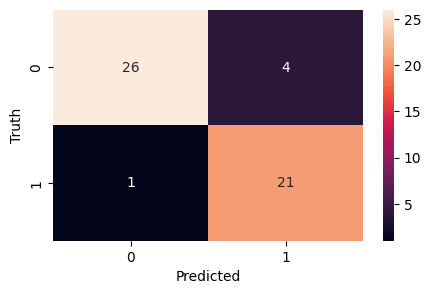

In [27]:
plt.figure(figsize=(5,3))
sns.heatmap(cnf_mtx, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [38]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

       False       0.96      0.87      0.91        30
        True       0.84      0.95      0.89        22

    accuracy                           0.90        52
   macro avg       0.90      0.91      0.90        52
weighted avg       0.91      0.90      0.90        52



In [34]:
model2 = keras.Sequential([
	keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.5),
	keras.layers.Dense(60, activation='relu'),
    keras.layers.Dropout(0.5),
	keras.layers.Dense(30, activation='relu'),
    keras.layers.Dropout(0.5),
	keras.layers.Dense(15, activation='relu'),
    keras.layers.Dropout(0.5),
	keras.layers.Dense(1, activation='sigmoid')
])


model2.compile(
    optimizer='adam', 
    loss='binary_crossentropy', 
    metrics=['accuracy']
)

In [35]:
model2.fit(X_train, y_train, epochs=100, batch_size=8)

Epoch 1/100


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4922 - loss: 0.8047
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4580 - loss: 0.7559 
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5233 - loss: 0.7234 
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4667 - loss: 0.7387 
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4470 - loss: 0.7510 
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5730 - loss: 0.7134 
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5144 - loss: 0.7511 
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5201 - loss: 0.6843 
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5140 - loss: 0.7058 
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5109 - loss: 0.6899 
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4432 - loss: 0.7112 
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0

In [36]:
model2.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7965 - loss: 0.6408  


[0.6414833068847656, 0.7884615659713745]